In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from os import listdir

exp_path = '../experiments'

In [2]:
def load_results(f_name):
    out = []
    for dir in listdir(exp_path):
        if dir.startswith('2024'):
            df = pd.read_csv(f'{exp_path}/{dir}/{f_name}')
            psi = float(dir.split('_')[-1])
            df['psi'] = psi
            out.append(df)
    return pd.concat(out)

# runtime analysis

In [3]:
# Load data
runtimes = load_results('epoch_runtimes.csv')

# Load chap3 data as comparison
chap3_runtimes = pd.read_csv('../../../../Chapter3/analysis/experiments/runtimes/per_epoch_runtimes.csv')
chap3_runtimes.query('dataset == "selfloops" and model == "simple" and trial == 21 and epoch <= 480', inplace=True)
chap3_runtimes = chap3_runtimes[['epoch', 'runtime']]
chap3_runtimes['psi'] = 0.0

# Format
runtimes = pd.concat([runtimes, chap3_runtimes])
runtimes['psi_s'] = [f'{val:.0e}' if val > 0 else 'N/A\n(Chapter 3)' for val in runtimes.psi.values]
runtimes.sort_values('psi', inplace=True)
runtimes

,epoch,runtime,psi,psi_s
19699,128,118.783565,0.0,N/A\n(Chapter 3)
19811,240,118.704291,0.0,N/A\n(Chapter 3)
19812,241,118.223530,0.0,N/A\n(Chapter 3)
19813,242,118.818496,0.0,N/A\n(Chapter 3)
19814,243,118.725719,0.0,N/A\n(Chapter 3)
...,...,...,...,...
6,7,258.632777,0.1,1e-01
7,8,246.507306,0.1,1e-01
8,9,252.731538,0.1,1e-01
48,49,247.840091,0.1,1e-01


/var/folders/_x/2pk9s5z166x9c0h399wmby_h0000gp/T/ipykernel_89013/28410350.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(runtimes, x='psi_s', y='runtime', ci='sd')


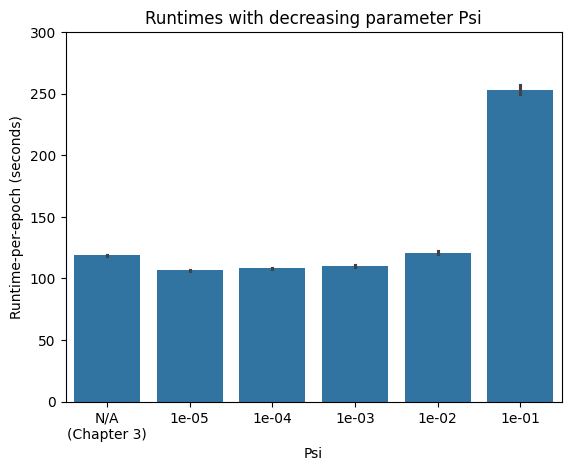

In [4]:
# Draw figure
sns.barplot(runtimes, x='psi_s', y='runtime', ci='sd')

# Fig labels
plt.title('Runtimes with decreasing parameter Psi')
plt.ylabel('Runtime-per-epoch (seconds)')
plt.xlabel('Psi')

# Vertical separator
ymin, ymax = 0, 300
#plt.vlines(x=0.5, ymin=ymin, ymax=ymax, colors='red', linestyles='--')
plt.ylim(ymin, ymax)

# Save
plt.savefig('runtimes_vs_chap3.png', bbox_inches="tight")

# PolySE results with decreasing Psi

In [6]:
polySE = load_results('polySE_results_aggregations.csv')

psi_075 = pd.read_csv('../../1_general_assessment/experiments/morgan/morgan_n20/20240524-070322-morgan_n20_psi_0.75/polySE_results_aggregations.csv')
psi_075['psi'] = 0.75

chap4 = pd.read_csv('../../../../Chapter4/data/results/polySE.csv')
chap4.query('neighbourhood_method == "drug similarity" and vector_method == "mean components"', inplace=True)
chap4.drop(columns=['neighbourhood_method', 'vector_method'], inplace=True)
chap4['psi'] = 0.0

polySE = pd.concat([polySE, psi_075, chap4])

# Create x tick labels
psi_s = []
for val in polySE.psi.values:
    if val == 0:
        psi_s.append('N/A\n(Chapter 4)')
    elif val < 0.75:
        psi_s.append(f'{val:.0e}')
    else:
        psi_s.append(0.75)
polySE['psi_s'] = psi_s
polySE['Scenario'] = ['Cold-start' if s == 'both' else 'Warm-start' for s in polySE.fake_triple_component]
polySE.sort_values('psi', inplace=True)
polySE

,side_effect,fake_triple_component,AUROC,AUPRC,AP50,psi,psi_s,Scenario
23105,C0020625,tail,0.817703,0.788469,0.877383,0.00,N/A\n(Chapter 4),Warm-start
7744,C0019284,head,0.822066,0.833131,0.803231,0.00,N/A\n(Chapter 4),Warm-start
7743,C0019284,both,0.507031,0.513896,0.296260,0.00,N/A\n(Chapter 4),Cold-start
7721,C0019270,tail,0.871669,0.833729,0.746449,0.00,N/A\n(Chapter 4),Warm-start
7720,C0019270,head,0.786774,0.770904,0.836908,0.00,N/A\n(Chapter 4),Warm-start
...,...,...,...,...,...,...,...,...
1920,C0039503,head,0.870610,0.833243,0.766191,0.75,0.75,Warm-start
1919,C0039483,both,0.676538,0.615037,0.393929,0.75,0.75,Cold-start
1918,C0039483,tail,0.901974,0.866053,0.768185,0.75,0.75,Warm-start
1916,C0039446,both,0.644930,0.587609,0.365529,0.75,0.75,Cold-start


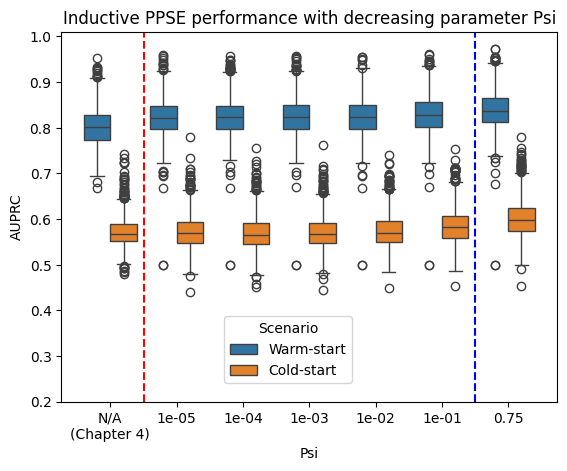

In [7]:
sns.boxplot(polySE, x='psi_s', y='AUPRC', hue='Scenario')

plt.title('Inductive PPSE performance with decreasing parameter Psi')
plt.xlabel('Psi')

ymin, ymax = 0.2, 1.01
plt.vlines(x = 0.5, ymin=ymin, ymax=ymax, colors='red', linestyles='--')
plt.vlines(x = 5.5, ymin=ymin, ymax=ymax, colors='blue', linestyles='--')
plt.ylim(ymin, ymax)
plt.legend(bbox_to_anchor=(0.6, 0.25), title='Scenario')

plt.savefig('AUPRC_vs_chap4_and_part1.png', bbox_inches="tight")
